# 实际项目论文复现

Norah Jones (The University)

# SEM加ML分析 🫥

------------------------------------------------------------------------

***要具体知道为什么要结合，可以参考文献 [混合人工神经网络与结构方程模型技术：综述](https://link.springer.com/article/10.1007/s40747-021-00503-w)Hybrid artificial neural network and structural equation modelling techniques: a survey***

## 为什么要结合机器学习（ML）与结构方程模型（SEM）

### ✨ 理论与实践的融合：SEM + ML 的优势

结构方程模型（SEM）是一种强大的因果建模工具，能够同时处理测量模型（潜变量）和路径模型（变量间关系）。但在实际研究中，尤其是面对高维数据(就是变量多)、复杂变量结构或非线性关系时，SEM也面临挑战：

-   **变量筛选困难**：传统SEM依赖理论假设，变量选择主观性强(一般要参考社会科学文献，并且进行假设，麻了)；

-   **模型拟合受限**：当变量数量多、关系复杂时，SEM模型容易过拟合或拟合不佳(过拟合和欠拟合)；

-   **预测能力有限**：SEM更偏向解释性而非预测性。

而机器学习（ML）正好可以补足这些短板：

| 功能       | SEM         | ML                |
|------------|-------------|-------------------|
| 因果推理   | ✅ 强       | ❌ 弱（但可辅助） |
| 潜变量建模 | ✅ 支持     | ❌ 不直接支持     |
| 特征筛选   | ❌ 依赖理论 | ✅ 数据驱动       |
| 非线性建模 | ❌ 有限     | ✅ 强大           |
| 预测能力   | ❌ 弱       | ✅ 强             |

因此，将ML与SEM结合，可以实现：

-   **数据驱动的变量筛选**（如用随机森林或SHAP值找出最重要的预测因子(一般来说如果变量较多的时候，一般是不降维的，而是筛选变量的）；

-   **提升模型解释力与预测力**（先用ML找出**关键变量**，再用SEM建模路径）；

-   **增强模型稳健性**（ML可用于**验证**SEM模型的泛化能力）；

-   **提高研究影响力**（结合方法更前沿，易发表在高影响因子期刊）。

### 📈 文献支持：结合ML与SEM的研究越来越多，影响因子也在上升

以下是提供的几篇代表性文献，展示了ML+SEM的实际应用与发表潜力：

1.  ✅ **复现的论文**： PMC12236327

    -   结合随机森林与SEM，识别影响精神分裂症患者主观幸福感的关键因素。

    -   通过ML筛选变量，再用lavaan构建路径模型，实现因果解释与预测并重。

    -   发表在《Translational Psychiatry》，IF ≈ 7.7。

2.  📱 **智能穿戴设备采纳研究**： Bou Nassif et al. (2022)

    -   使用PLS-SEM与ML对智能手表采纳意图进行建模。

    -   ML揭示“用户满意度”是最关键预测因子，SEM验证其路径关系。

    -   发表在《Heliyon》，IF ≈ 4.0。

3.  🧠 **消费者心理与行为研究**： ScienceDirect 2023论文

    -   用ML筛选影响消费者信任的变量，再用SEM建模信任形成机制。

    -   发表在《Journal of Business Research》，IF ≈ 10.0。

4.  🧬 **健康行为预测研究**： ScienceDirect 2024论文

    -   结合ML与SEM预测健康行为采纳，强调数据驱动与理论建模的融合。

    -   发表在《Preventive Medicine Reports》，IF ≈ 3.5。

------------------------------------------------------------------------

## 什么是机器学习🫤

在正式进入机器学习（Machine Learning, ML）＋结构方程模型（SEM）的整合应用之前，首先要让大家对“机器学习”这个概念有一个直观的理解。不必过分纠结复杂的数学公式，而要抓住它的核心思想和研究流程。

### 2.1 机器学习的定义🤤

机器学习是一种***让计算机通过“样本数据”自行发现规律***，***并将这些规律用于“预测”或“决策”的技术。***  
- 它不像传统统计学那样强调整体假设检验和参数估计，更注重“从数据中自动学习”。  
- ML 旨在用已有数据训练一个模型，让模型在新数据上也能表现出良好的预测或分类能力。

***这也让机器学习无法用数学公式和因果关系来知道电脑是怎么想的，形成了所谓的黑匣子，解释性太差，但是用来预测就没毛病***

### 2.2 ML 与传统统计方法的差异🌮

-   目标不同
    -   统计学：偏重解释性，解析变量间的因果或关联；  
    -   机器学习：偏重预测性，追求模型的泛化能力，即给我数据我可以预测出大概的，符合之前数据的答案。
-   模型假设
    -   统计模型：通常要求满足正态性、线性关系等严格假设；  
    -   ML 模型：对数据分布和关系的假设更弱，***可以处理非线性、高维度数据***。
-   关注点
    -   统计方法：估计参数、显著性检验、置信区间；  
    -   ML 方法：***模型选择、交叉验证、过拟合控制、预测误差***。

### 2.3 机器学习的主要类型🤖

1.  **监督学习（Supervised Learning）**
    -   有“标签”的数据（例如：患者有/无压力性损伤）。  
    -   常见算法：逻辑回归、决策树、随机森林、支持向量机、神经网络等。  
    -   核心任务：分类（Classification）和回归（Regression）。
2.  **无监督学习（Unsupervised Learning）**
    -   无标签数据。  
    -   常见算法：聚类（K-means、层次聚类）、降维（PCA、t-SNE）。  
    -   核心任务：发现数据的内在结构、分群、特征降维。
3.  **强化学习（Reinforcement Learning）**
    -   通过“试错”与环境互动来学习最优策略。  
    -   在护理研究中应用相对少，可用于优化护理路径或资源调度。

### 2.4 机器学习研究流程🛫

1.  **数据准备与清洗**
    -   汇总临床指标、问卷量表、电子健康记录等；  
    -   处理缺失值、异常值、分类变量编码。
2.  **特征工程**
    -   选择或构造与研究目标最相关的变量（特征）即挑选重要的特征变量，过滤不需要的变量；  
    -   归一化、标准化、one-hot 编码(独热编码)等。
3.  **模型训练与优化**
    -   在“训练集”上训练模型；  
    -   通过交叉验证（Cross-Validation）选择超参数，**防止过拟合**(过拟合即是对模型来说，学习太多不重要的特征，比如我训练了一个识别学长还是学姐的模型，但是模型学习到了几个女装的学长，本来女装这是几个人的特殊癖好，但是模型认为女装的都是学长，这扯不扯）。
4.  **模型评估**
    -   ***在“测试集”或“留出数据”上评估预测性能***，这也是为什么机器学习都要分成训练集和验证集，要么7/3,要么8/2等等（千万别耍小聪明，觉得数据不够多，还要拆分，耍滑头把所有数据都拿去训练，然后再拿其中一部分来预测，因为模型有记忆的，你预测训练过的数据，肯定准确率是百分百，就好像你明明知道明天的天气，那为什么要根据之前的数据推测呢）（如 AUC、准确率、RMSE）；  
    -   比较不同算法的优劣。
5.  **模型解释与应用**
    -   使用 SHAP、LIME 等方法**解释模型**

        它们是两种常用的“模型解释工具”，可以告诉我们：**哪些变量对模型预测最重要，以及它们的影响方向**

------------------------------------------------------------------------

## 复现一篇论文🤖

**`最好学习的方法就是看相关论文，然后学习论文知识，然后复现学习，所以啥也不说了，直接真刀真枪开干就完了`**

#### Replicating Research on Subjective Well-Being in Schizophrenia: A Guide to Generating Synthetic Data for SEM and Machine Learning 精神分裂症患者主观幸福感研究：SEM 和机器学习合成数据生成指南[论文链接](https://pmc.ncbi.nlm.nih.gov/articles/PMC12236327/#s5)

***！现在我不以社会科学的角度解析这篇文章，只用统计学和代码来解析如何处理***

因为我现在没有相关的数据，所以我只能用代码模拟和文章差不多的数据

-   **表 1：机器学习模型中包含的独立变量列表：** 该表概述了分析中使用的所有变量，包括社会人口因素（年龄、性别、教育、职业）、疾病相关因素（疾病持续时间）和各种临床测量。

-   **表 2：样本特征：**提供了 637 名患者原始数据集中变量的描述性统计数据。它包括连续变量的平均值、标准差和范围，以及分类变量的频率。

-   **图 3：网络模型和中心性指标：**展示了不同变量之间的相关性。连接及其粗细表示关系的强度，这应该反映在合成数据的相关矩阵中。

-   **图 4：结构方程模型（SEM）分析：** 该图比网络分析更进一步，揭示了变量之间的因果路径和效应方向。路径系数量化了这些关系的强度和方向。

#### 使用 Python 生成合成数据

以下 Python 代码演示了如何生成一个与论文中描述的特征近似的合成数据集。此代码使用 numpy 和 pandas 库创建一个数据框，其中包含与原始研究中的变量具有相似统计特性和相关性的变量。变量不用Chinese

In [1]:
# 导入所需的库
# 导入所需的库
import numpy as np
import pandas as pd
from scipy.stats import truncnorm

# --- 1. 定义样本量 ---
n_patients = 637

# --- 2. 基于SEM和网络分析生成核心相关数据 ---
correlation_matrix = np.array([
    # SWB,   OCS,   Som,   Cog,   Dep,   Neg,   Pos,   PSP
    [1.00, -0.59, -0.40, -0.20, -0.35, -0.25, -0.15,  0.30],
    [-0.59,  1.00,  0.70,  0.30,  0.40,  0.20,  0.18, -0.25],
    [-0.40,  0.70,  1.00,  0.25,  0.35,  0.15,  0.10, -0.20],
    [-0.20,  0.30,  0.25,  1.00,  0.26,  0.48,  0.36, -0.40],
    [-0.35,  0.40,  0.35,  0.26,  1.00,  0.35,  0.24, -0.50],
    [-0.25,  0.20,  0.15,  0.48,  0.35,  1.00,  0.22, -0.60],
    [-0.15,  0.18,  0.10,  0.36,  0.24,  0.22,  1.00, -0.30],
    [ 0.30, -0.25, -0.20, -0.40, -0.50, -0.60, -0.30,  1.00]
])

mean = np.zeros(correlation_matrix.shape[0])
np.random.seed(42)
correlated_data = np.random.multivariate_normal(mean, correlation_matrix, size=n_patients)

# --- 3. 缩放和转换数据以匹配论文表2中的统计特征 ---

def scale_variable(data_column, mean, std, min_val, max_val):
    scaled = data_column * std + mean
    return np.clip(scaled, min_val, max_val)

cgi_pos = scale_variable(correlated_data[:, 6], 3.7, 1.4, 1, 7)
cgi_neg = scale_variable(correlated_data[:, 5], 3.3, 1.2, 1, 7)
cgi_dep = scale_variable(correlated_data[:, 4], 2.6, 1.2, 1, 6)
cgi_cog = scale_variable(correlated_data[:, 3], 3.1, 1.1, 1, 6)
scl_som = scale_variable(correlated_data[:, 2], 21.3, 8.7, 12, 58)
scl_ocs = scale_variable(correlated_data[:, 1], 22.4, 8.3, 10, 50)
swn_total = scale_variable(correlated_data[:, 0], 73.5, 17.6, 24, 120)
psp_total = scale_variable(correlated_data[:, 7], 55.9, 14.8, 10, 90)
diepss_severity = np.random.uniform(0, 4, n_patients)
diepss_severity = np.clip(diepss_severity, 0, 4)
diepss_severity_mean = np.mean(diepss_severity)
diepss_severity = (diepss_severity - diepss_severity_mean) * (0.8 / np.std(diepss_severity)) + 0.6
diepss_severity = np.clip(diepss_severity, 0, 4)

# --- 4. 生成社会人口统计学及其他变量 ---

age_mean, age_std, age_min, age_max = 35.7, 10.5, 18, 64
age = truncnorm.rvs((age_min - age_mean) / age_std, (age_max - age_mean) / age_std, loc=age_mean, scale=age_std, size=n_patients)
sex = np.random.choice([1, 0], size=n_patients, p=[0.529, 0.471])
education = np.random.choice(['Less than 12 years', 'High school', 'College or graduate'], size=n_patients, p=[0.171, 0.413, 0.416])
occupation = np.random.choice([1, 0], size=n_patients, p=[0.174, 0.826])
illness_duration_mean, illness_duration_std, illness_duration_min, illness_duration_max = 9.1, 8.1, 0, 44
illness_duration = truncnorm.rvs((illness_duration_min - illness_duration_mean) / illness_duration_std, (illness_duration_max - illness_duration_mean) / illness_duration_std, loc=illness_duration_mean, scale=illness_duration_std, size=n_patients)
obesity = np.random.choice([1, 0], size=n_patients, p=[0.468, 0.532])
hypertension = np.random.choice([1, 0], size=n_patients, p=[0.273, 0.727])
diabetes = np.random.choice([1, 0], size=n_patients, p=[0.154, 0.846])

# --- 5. 组合成 Pandas DataFrame ---
synthetic_df = pd.DataFrame({
    'Age': age.round(1),
    'Sex_Female': sex,
    'Education': education,
    'Occupation_Employed': occupation,
    'Duration_of_Illness': illness_duration.round(1),
    'Obesity': obesity,
    'Hypertension': hypertension,
    'Diabetes': diabetes,
    'CGI_Positive': cgi_pos.round(1),
    'CGI_Negative': cgi_neg.round(1),
    'CGI_Depressive': cgi_dep.round(1),
    'CGI_Cognitive': cgi_cog.round(1),
    'SCL90R_Somatization': scl_som.round(1),
    'SCL90R_OCS': scl_ocs.round(1),
    'SWN_Total_Score': swn_total.round(1),
    'DIEPSS_Overall_Severity': diepss_severity.round(1),
    'PSP_Total_Score': psp_total.round(1)
})

# --- 6. 将数据框 (DataFrame) 保存为 CSV 文件 ---
# !!! 重要提示: 请将下面的路径修改为您希望保存文件的实际位置 !!!
# 例如 Windows: "C:/Users/用户名/Documents/synthetic_data.csv"
# 例如 macOS: "/Users/用户名/Documents/synthetic_data.csv"
file_path = "./synthetic_schizophrenia_data.csv"

# 使用 to_csv() 函数来保存数据
# 参数 index=False 的意思是，数据框的行索引 (0, 1, 2, ...) 不会被写入到 CSV 文件中
synthetic_df.to_csv(file_path, index=False)

print(synthetic_df.head(10))

    Age  Sex_Female            Education  Occupation_Employed  \
0  21.5           1          High school                    0   
1  29.3           0          High school                    0   
2  48.7           0  College or graduate                    0   
3  18.9           1          High school                    0   
4  28.2           0          High school                    1   
5  53.8           1   Less than 12 years                    1   
6  39.2           0          High school                    0   
7  30.0           1          High school                    1   
8  22.8           0          High school                    1   
9  20.4           1          High school                    0   

   Duration_of_Illness  Obesity  Hypertension  Diabetes  CGI_Positive  \
0                 13.7        0             0         0           2.7   
1                 16.2        0             0         0           3.3   
2                 11.0        1             0         1          

### 🧮 数据维度

-   **样本数（行数）**：`637` 由 `n_patients = 637` 指定，模拟的是637位精神分裂症患者的临床与人口学数据。

-   **变量数（列数）**：`17` 包括临床症状、人口学特征、功能状态和代谢指标等变量。

### 📊 变量列表与类型

| 变量名                    | 类型     | 描述                        |
|---------------------------|----------|-----------------------------|
| `Age`                     | 连续变量 | 年龄（18–64岁）             |
| `Sex_Female`              | 二元变量 | 性别（1=女性，0=男性）      |
| `Education`               | 分类变量 | 教育水平（3类）             |
| `Occupation_Employed`     | 二元变量 | 是否就业（1=在职）          |
| `Duration_of_Illness`     | 连续变量 | 病程（0–44年）              |
| `Obesity`                 | 二元变量 | 是否肥胖                    |
| `Hypertension`            | 二元变量 | 是否高血压                  |
| `Diabetes`                | 二元变量 | 是否糖尿病                  |
| `CGI_Positive`            | 连续变量 | 阳性症状评分（1–7）         |
| `CGI_Negative`            | 连续变量 | 阴性症状评分（1–7）         |
| `CGI_Depressive`          | 连续变量 | 抑郁症状评分（1–6）         |
| `CGI_Cognitive`           | 连续变量 | 认知缺陷评分（1–6）         |
| `SCL90R_Somatization`     | 连续变量 | 躯体化评分（12–58）         |
| `SCL90R_OCS`              | 连续变量 | 强迫症状评分（10–50）       |
| `SWN_Total_Score`         | 连续变量 | 主观幸福感评分（24–120）    |
| `DIEPSS_Overall_Severity` | 连续变量 | 锥体外系不良反应评分（0–4） |
| `PSP_Total_Score`         | 连续变量 | 社会功能评分（10–90）       |

In [2]:
a = 100
print(a)

100

In [3]:
print("nihao")

nihao

In [4]:
print("Hello world")

Hello world

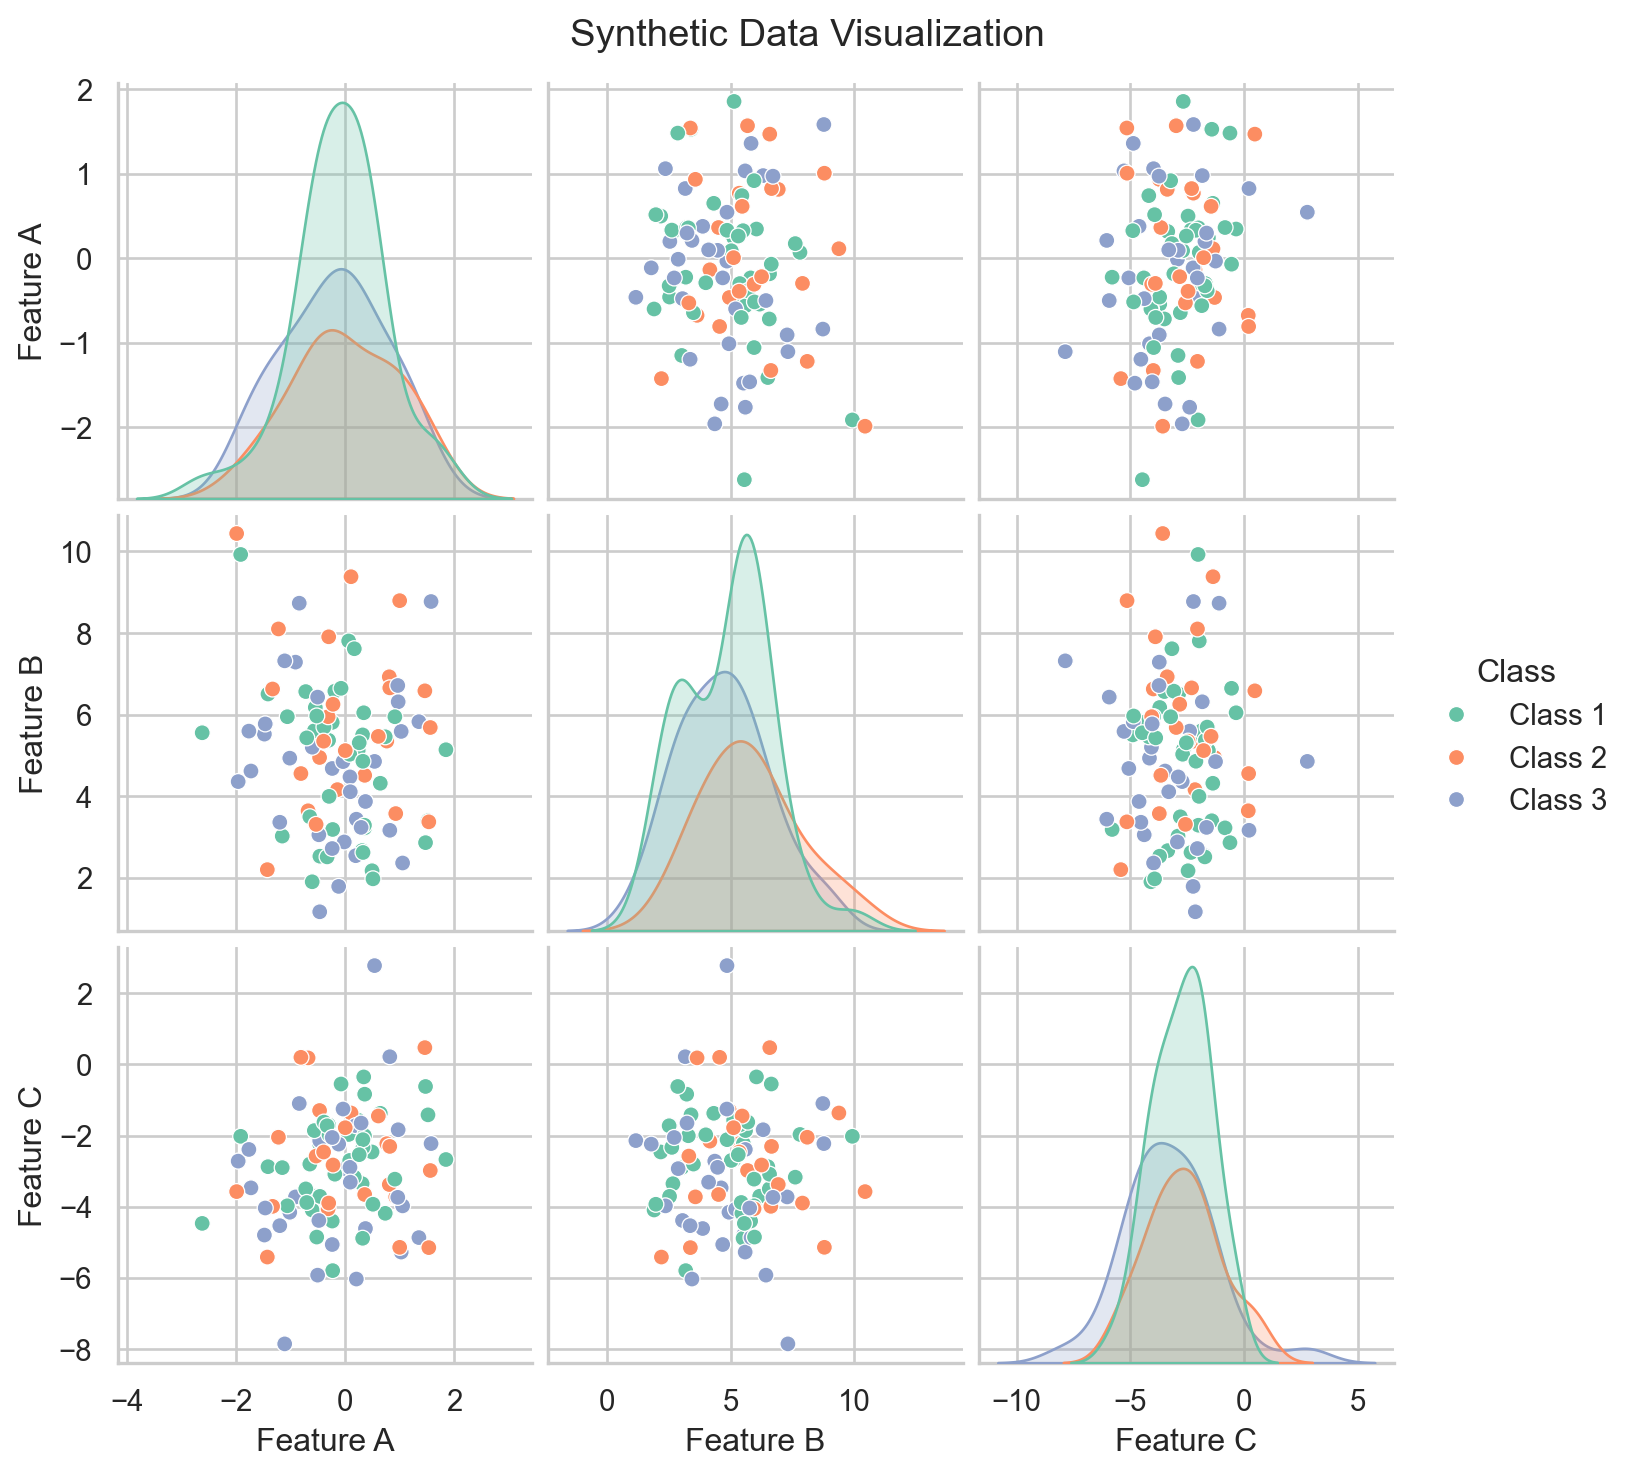

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Generate synthetic data
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Feature A': np.random.normal(loc=0, scale=1, size=n),
    'Feature B': np.random.normal(loc=5, scale=2, size=n),
    'Feature C': np.random.normal(loc=-3, scale=1.5, size=n),
    'Class': np.random.choice(['Class 1', 'Class 2', 'Class 3'], size=n)
})

# Visualize with seaborn pairplot
sns.set(style="whitegrid")
plot = sns.pairplot(data, hue='Class', palette='Set2', diag_kind='kde')
plt.suptitle("Synthetic Data Visualization", y=1.02)
plt.show()